In [1]:
import numpy as np
import time

# Simulated Annealing

Solve the Sudoku problem with Simulated Annealing. You can design your own algorithm or simply refer to [Metaheuristics_can_solve_Sudoku_puzzles](https://www.researchgate.net/publication/220403361_Metaheuristics_can_solve_Sudoku_puzzles). 

The code provided below starts with making a problem instance and ends by visualizing the running process of SA.

In [2]:
# making a problem instance
def make_grid_python(n):
    grid = np.empty((n**2, n**2), int)
    x = 0
    for i in range(n):
        for j in range(n):
            for k in range(n**2):
                grid[n*i+j, k] = x%(n**2) + 1
                x += 1
            x += n
        x += 1
    return grid

def make_grid_numpy(n):
    return np.fromfunction(lambda i, j: (i*n+i//n+j)%(n**2)+1, (n**2, n**2), dtype=int)

# a comparison between native python and numpy
# vary n to see their performances
n = 10
%timeit make_grid_python(n)
%timeit make_grid_numpy(n)

# test
grid = make_grid_numpy(3)
grid

7.72 ms ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
112 µs ± 4.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
       [4, 5, 6, 7, 8, 9, 1, 2, 3],
       [7, 8, 9, 1, 2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6, 7, 8, 9, 1],
       [5, 6, 7, 8, 9, 1, 2, 3, 4],
       [8, 9, 1, 2, 3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7, 8, 9, 1, 2],
       [6, 7, 8, 9, 1, 2, 3, 4, 5],
       [9, 1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)

In [146]:
import random
class Sudoku:
    @classmethod
    def create(cls, n, seed=303):
        rng = np.random.default_rng(seed)
        init_grid = make_grid_numpy(n)
        # randomly mask out some cells to create a problem instance
        # cells marked by *1* is given and fixed
        mask = rng.integers(0, 2, size=init_grid.shape)
        grid = init_grid*mask

        return cls(n, mask, grid, seed)

    def __init__(self, n, mask, grid, seed) -> None:
        self.seed = seed
        self.mask = mask
        self.grid = grid
        self.n = n
        self.all = set(range(1, n**2+1))

    def value(self):
        # TODO: evaluate the current state, return a scalar value
        def check(i, j, n, grid):
            eng = 0
            for r in range(n**2):
                if grid[i][j] == grid[r][j] and i != r:
                    eng += 1
                if grid[i][j] == grid[i][r] and j != r:
                    eng += 1
            return eng
        _n = self.n ** 2
        res = 0
        for i in range(_n):
            for j in range(_n):
                if self.mask[i][j] == 1:
                    continue
                res += check(i, j, self.n, self.grid)
        return res

    def local_search(self):
        # TODO: apply your neighborhood search operator to get the next state
        new_grid = self.grid.copy()
        n = self.n
        x0 = random.randint(0, n-1) * n
        y0 = random.randint(0, n-1) * n
        i1 = random.randint(0, n-1)
        j1 = random.randint(0, n-1)
        p1 = i1 + x0
        q1 = j1 + y0
        i2 = random.randint(0, n-1)
        j2 = random.randint(0, n-1)
        p2 = i2 + x0
        q2 = j2 + y0
        if self.mask[p1][q1] == 1 or self.mask[p2][q2] == 1 or new_grid[p2][q2] == new_grid[p1][q1]:
            return self
        else :
            new_grid[p1][q1], new_grid[p2][q2] = new_grid[p2][q2], new_grid[p1][q1]
        return Sudoku(n, self.mask, new_grid, self.seed)

    def init_solution(self):
        rng = np.random.default_rng(self.seed)
        n = self.n
        grid = self.grid.reshape(n, n, n, n).transpose(0, 2, 1, 3)
        for I in np.ndindex(n, n):
            idx = grid[I]==0
            grid[I][idx] = rng.permutation(list(self.all-set(grid[I].flat)))
        return self
        
    def __repr__(self) -> str:
        return self.grid.__repr__()

In [159]:
temp = Sudoku.create(3).init_solution()
print(temp)
c  = temp.local_search()
print(c)
print(np.where(temp == c))

array([[9, 2, 3, 4, 3, 6, 8, 6, 9],
       [4, 5, 1, 7, 8, 9, 1, 2, 3],
       [7, 6, 8, 5, 2, 1, 4, 5, 7],
       [2, 3, 4, 3, 6, 7, 4, 9, 1],
       [5, 6, 7, 9, 1, 5, 5, 3, 8],
       [8, 9, 1, 8, 2, 4, 7, 2, 6],
       [3, 4, 5, 1, 9, 8, 4, 1, 2],
       [6, 7, 8, 7, 2, 4, 3, 6, 5],
       [9, 1, 2, 3, 6, 5, 9, 7, 8]], dtype=int64)
array([[9, 2, 3, 4, 3, 6, 8, 6, 9],
       [4, 5, 1, 7, 8, 9, 1, 2, 3],
       [7, 6, 8, 5, 2, 1, 4, 5, 7],
       [2, 3, 4, 3, 6, 7, 4, 9, 1],
       [5, 6, 7, 9, 1, 5, 5, 3, 8],
       [8, 9, 1, 8, 2, 4, 7, 2, 6],
       [3, 4, 5, 1, 9, 8, 4, 1, 2],
       [6, 7, 8, 7, 2, 4, 3, 6, 5],
       [9, 1, 2, 3, 6, 5, 9, 7, 8]], dtype=int64)
(array([0], dtype=int64),)


In [5]:
# test
sudoku = Sudoku.create(3)
sudoku = sudoku.init_solution()
sudoku, sudoku.value()

(array([[9, 2, 3, 4, 3, 6, 8, 6, 9],
        [4, 5, 1, 7, 8, 9, 1, 2, 3],
        [7, 6, 8, 5, 2, 1, 4, 5, 7],
        [2, 3, 4, 3, 6, 7, 4, 9, 1],
        [5, 6, 7, 9, 1, 5, 5, 3, 8],
        [8, 9, 1, 8, 2, 4, 7, 2, 6],
        [3, 4, 5, 1, 9, 8, 4, 1, 2],
        [6, 7, 8, 7, 2, 4, 3, 6, 5],
        [9, 1, 2, 3, 6, 5, 9, 7, 8]], dtype=int64),
 44)

In [171]:
def simulated_annealing(initial:Sudoku, schedule, halt, log_interval=200):
    state = initial.init_solution()
    print(state)
    val = state.value()
    t = 0           # time step
    T = schedule(t) # temperature
    f = [state.value()] # a recording of values
    while not halt(T):
        T = schedule(t)
        new_state = state.local_search()
        new_value = new_state.value()
        # TODO: implement the replacement here
        # take replacement
        if val - new_value > 0:
            state = new_state
            val = new_value
        elif random.random() < np.exp((val - new_value)/T):
            state = new_state
            val = new_value
        # update time and temperature
        if t % log_interval == 0:
            print(f"step {t}: T={T}, current_value={val}")
            f.append(val)
        t += 1
        if val == 0:
            break
        T = schedule(t)
    print(f"step {t}: T={T}, current_value={val}")
    return state, f

In [172]:
import matplotlib.pyplot as plt

# define your own schedule and halt condition
# run the algorithm on different n with different settings
n = 3
solution, record = simulated_annealing(
    initial=Sudoku.create(n), 
    schedule=lambda t: 0.999**t, 
    halt=lambda T: T<1e-12,
    log_interval=200
)
solution, solution.value()

array([[9, 2, 3, 4, 3, 6, 8, 6, 9],
       [4, 5, 1, 7, 8, 9, 1, 2, 3],
       [7, 6, 8, 5, 2, 1, 4, 5, 7],
       [2, 3, 4, 3, 6, 7, 4, 9, 1],
       [5, 6, 7, 9, 1, 5, 5, 3, 8],
       [8, 9, 1, 8, 2, 4, 7, 2, 6],
       [3, 4, 5, 1, 9, 8, 4, 1, 2],
       [6, 7, 8, 7, 2, 4, 3, 6, 5],
       [9, 1, 2, 3, 6, 5, 9, 7, 8]], dtype=int64)
step 0: T=1.0, current_value=43
step 200: T=0.8186488294786356, current_value=38
step 400: T=0.6701859060067401, current_value=24
step 600: T=0.5486469074854967, current_value=22
step 800: T=0.4491491486100751, current_value=19
step 1000: T=0.36769542477096373, current_value=16
step 1200: T=0.3010134290933991, current_value=16
step 1400: T=0.2464242913846615, current_value=16
step 1600: T=0.20173495769715533, current_value=15
step 1800: T=0.16515008698369826, current_value=15
step 2000: T=0.13519992539749945, current_value=15
step 2200: T=0.11068126067226176, current_value=14
step 2400: T=0.09060908449456684, current_value=14
step 2600: T=0.0741770209616

(array([[1, 2, 3, 5, 4, 6, 6, 8, 9],
        [4, 5, 8, 7, 1, 9, 1, 2, 3],
        [7, 6, 9, 8, 2, 3, 4, 5, 7],
        [2, 3, 4, 9, 6, 7, 8, 5, 1],
        [5, 6, 7, 1, 8, 2, 7, 3, 4],
        [8, 9, 1, 3, 5, 4, 2, 9, 6],
        [3, 4, 5, 6, 7, 8, 9, 1, 2],
        [6, 7, 8, 4, 9, 1, 3, 6, 5],
        [9, 1, 2, 3, 2, 5, 4, 7, 8]], dtype=int64),
 13)

140


Text(0, 0.5, 'value')

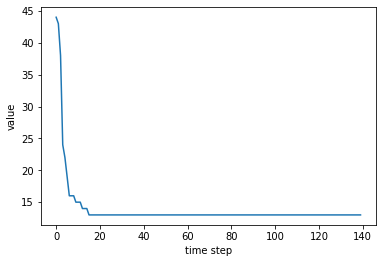

In [173]:
print(len(record))
# visualize the curve
plt.plot(record)
plt.xlabel("time step")
plt.ylabel("value")